# Clustering (K-Means y Jerárquico)

## Introducción
En esta guia vamos a experimientar como trabajar con algoritmos de _clustering_, que son técnicas de aprendizaje automático no supervisado, a partir del dataset iris.
<br />
A lo largo de esta guía veremos:
- Como preparar (escalar) datos para un proceso de agrupamiento,
- Cuales son los hiper-parámetros mas importantes en clustering,
- Como entrenar un algoritmo de _clustering_ con la librería Scikit Learn,
- Como graficar los _clusters_ encontrados por el algoritmo,
- Como calcular métricas de evaluación del modelo.


En este notebook vamos a utilizar las siguientes librerías:
- Scikit-learn y Scipy para el análisis,
- Matplotlib para los gráficos.

## Preparando los datos para clustering

Para comenzar, importamos del módulo sklearn.datasets la función __load_iris__ para cargar el dataset iris que vamos a utilizar.

In [97]:
from sklearn.datasets import load_iris
import pandas as pd

# cargo el dataset
iris = load_iris()

In [98]:
iris_df=pd.DataFrame(data=iris.data, columns=iris.feature_names)

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [99]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Generalmente, cuando trabajemos con algoritmos de _clustering_, dado que son algoritmos basados en distancias, va a ser fundamental escalar los datos para prescindir de las unidades de medida de las diferentes características. 

A continuación, escalamos los datos numéricos:

In [100]:
# Importamos dos módulos para escalado, existen más
# scale: Center to the mean and component wise scale to unit variance
# MinMaxScaler:
from sklearn.preprocessing import scale, MinMaxScaler

# scale
scaled_1 = scale(iris_df)

# MinMaxScaler
scaler = MinMaxScaler()
scaled_2 = scaler.fit_transform(iris_df)

# Muestro las primeras 5 filas escaladas con scale
print("Escalado con scale:")
print(scaled_1[1:6,])

# Muestro las primeras 5 filas escaladas con Min-Max
print("\nEscalado con Min-Max:")
print(scaled_2[1:6,])


Escalado con scale:
[[-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]]

Escalado con Min-Max:
[[0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]]


## Algoritmo K-Medias

### Entrenando el modelo

Para entrenar un cluster k-means,  debemos importar _KMeans_ del módulo sklearn.cluster.

Este algoritmo posee diferentes hiper-parámetros que se pueden configurar:

- __init:__ es el método de inicialización de los centroides. En este caso definimos _random_ para que se seleccionen aleatoriamente los puntos.

- __n_clusters:__ definine la cantidad N de clústers que queremos como resultado.

- __random_state:__ es la semilla de la aleatorización.



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


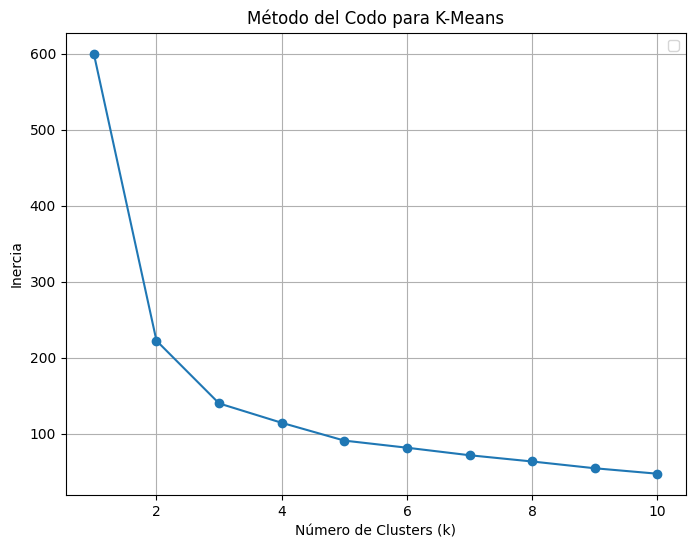

In [101]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calcular la inercia para diferentes valores de k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_1)
    inertia.append(kmeans.inertia_)

# Graficar la inercia en función de k
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-Means')

# # Marcar el número óptimo de clusters
# optimal_k = 3  # Reemplaza esto con el valor óptimo que obtengas
# plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Número Óptimo de Clusters ({optimal_k})')

plt.grid()
plt.legend()
plt.show()

In [102]:
from sklearn.cluster import KMeans

# Por defecto usa la distancia euclidea
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, random_state=0
)

# Para definir una métrica de distancia diferente usar el módulo KMeansClusterer
# kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)

Para realizar el cálculo, ejecutamos el método __fit_predict__ pasando como parámetro el dataset. Éste método realiza el fit y el predict en el mismo momento.

In [103]:
y_km = km.fit_predict(scaled_1)

Esto da como resultado un array con el número de clúster (empieza en 0!) al que pertenece cada observación.

In [104]:
print(y_km)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


Ahora vamos a graficar los clústeres, utilizamos Matplotlib. La mejor forma de ver como se comportan los datos es con un gráfico de dispersión (scatter).

La documentación completa de matplotlib.pyplot se puede consultar acá [2].

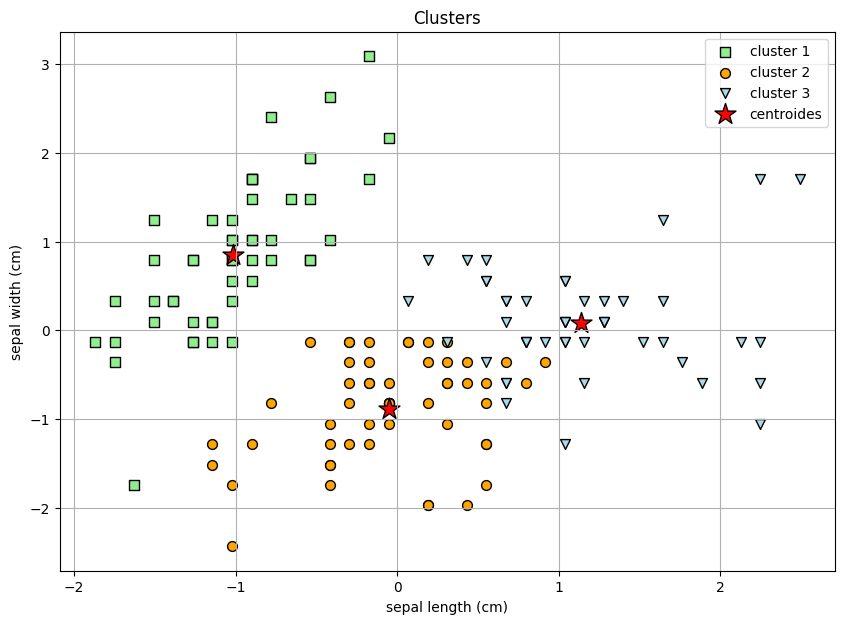

In [105]:
import matplotlib.pyplot as plt

#configuro el tamaño del grafico final
plt.figure(figsize=(10,7))

#scatter del primer cluster
plt.scatter(
    scaled_1[y_km == 0, 0], scaled_1[y_km == 0, 1], #0,0 hace una máscara de los datos que pertenecen al cluster 0 de la primera columna y 0,1 lo mismo pero para la segunda columna
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)
#scatter del segundo cluster
plt.scatter(
    scaled_1[y_km == 1, 0], scaled_1[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
#scatter del tercer cluster
plt.scatter(
    scaled_1[y_km == 2, 0], scaled_1[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)
#scatter del los centroides
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroides'
)
plt.legend()
plt.grid()
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Clusters')
plt.show()

## Algoritmos de Clustering Jerárquico

A continuación, vamos a realizar un clustering jerárquico. Para ello vamos a utilizar la librería _scipy_.

Importamos los módulo linkage para el agrupamiento y _dendogram_ para su visualización:


In [114]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Parámetros del Clustering Jerárquico
El método linkage recibe como parámetro los datos y método para el cálculo de distancia.

Los métodos para el cálculo de distancia soportados por _scipy_ son los siguientes:
- single,
- complete,
- average,
- weighted,
- centroid,
- median,
- ward.


In [152]:
H = linkage(scaled_1, 'single')

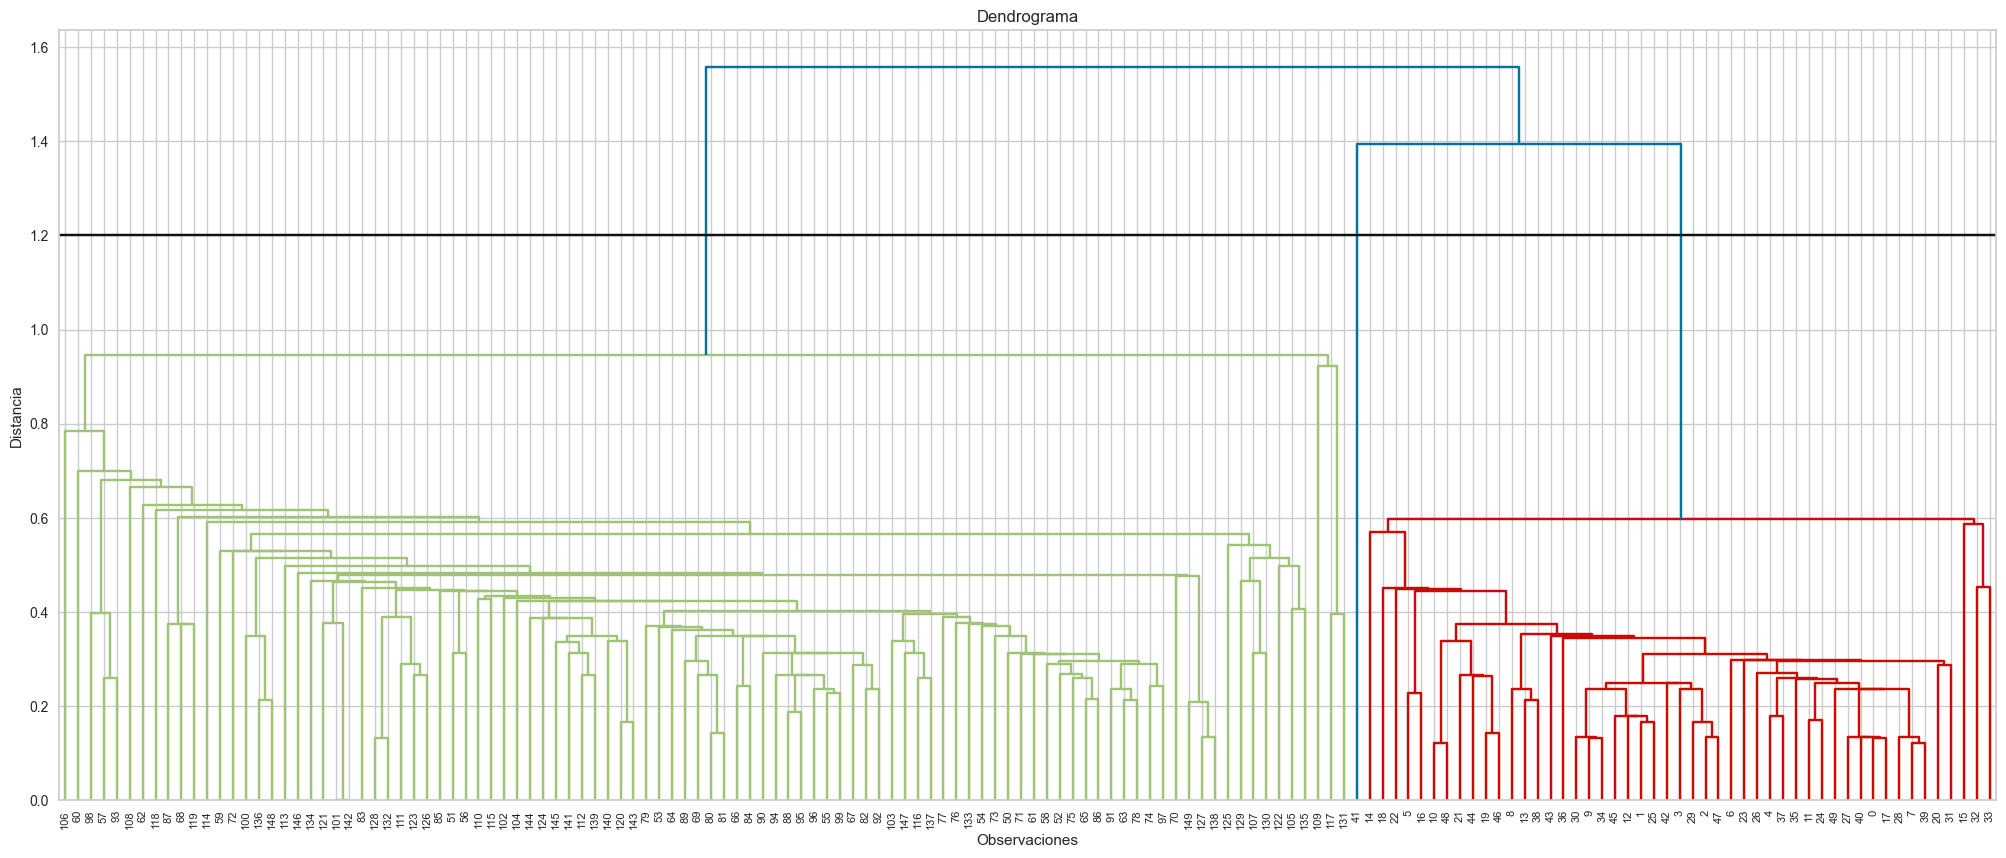

In [157]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

max_d = 1.2
plt.figure(figsize=(25, 10))
plt.title('Dendrograma')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
dendrogram(
    H, truncate_mode='lastp',
    p=150, leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.axhline(y=max_d, c='k')
plt.show()


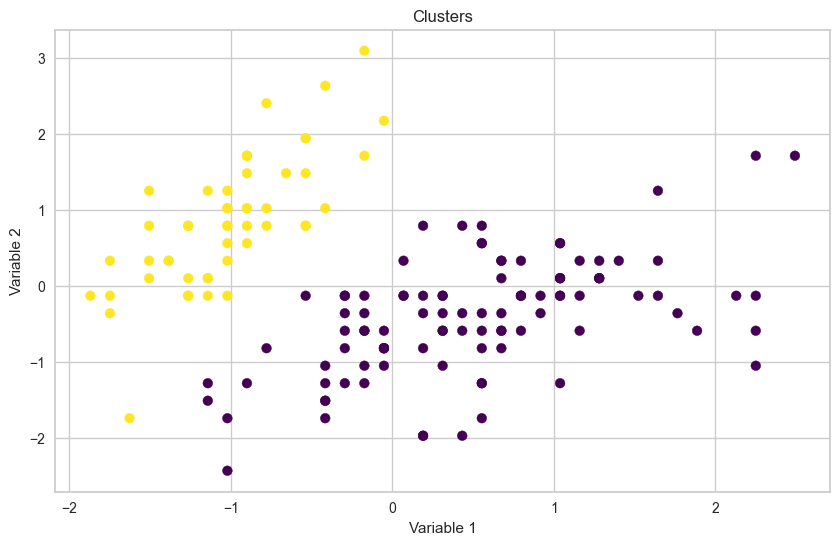

In [158]:
# Especificar el número de clusters que deseas obtener
num_clusters = 2  # Por ejemplo, queremos 3 clusters

# Realizar el corte en el dendrograma para obtener los clusters
clusters = fcluster(H, num_clusters, criterion='maxclust')

# Graficar los puntos con colores según el cluster al que pertenecen
plt.figure(figsize=(10, 6))
plt.scatter(scaled_1[:, 0], scaled_1[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')

# Mostrar el gráfico
plt.show()


Podemos ver la matriz de distancias:

In [156]:
from scipy.spatial.distance import pdist, squareform

squareform(pdist(scaled_1[0:4,]))

array([[0.        , 1.17621868, 0.84560741, 1.10368502],
       [1.17621868, 0.        , 0.52337301, 0.43399991],
       [0.84560741, 0.52337301, 0.        , 0.28389113],
       [1.10368502, 0.43399991, 0.28389113, 0.        ]])

## Métricas de evaluación para Clustering

Las métricas mas extendidas en clustering son el método de Elbow y el Índice de Silueta.

El __método de Elbow__ consiste básicamente en verificar la evolución de la suma de los cuadrados del error para varios valores de K y verificar cual es el que brinda un mejor agrupamiento.

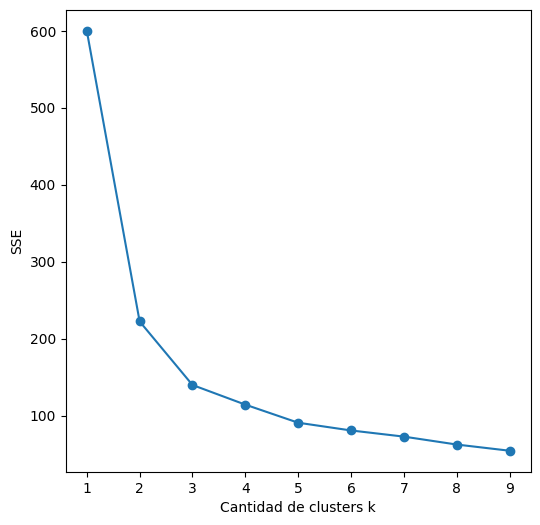

In [131]:
# Corro el algoritmo con K entre 2 y 10 y voy guardando el error para luego graficarlo.
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(scaled_1)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters k')
plt.ylabel('SSE');

Por otro lado, el __Índice de Silueta__, como vimos en la clase teórica, indica si existen o no, estructuras en los datos. <br /> <br />

A continuación graficamos el índice de silueta para 2<=k<=4:

In [159]:
from sklearn.metrics import silhouette_score

list_k = list(range(2, 5))

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(scaled_1)
    centers = clusterer.cluster_centers_

    score = silhouette_score (scaled_1, preds)
    print ("Para n_clusters =" + str(n_clusters) + " el puntaje de silhouette es " + str(score))

Para n_clusters =2 el puntaje de silhouette es 0.5817500491982808
Para n_clusters =3 el puntaje de silhouette es 0.45994823920518635
Para n_clusters =4 el puntaje de silhouette es 0.383850922475103


## Recursos

[1] https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

[2] https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html

[3] https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

[4] https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

[5] https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
